# UB Philantropy- Decision tree Classifier


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### Loading Data
Let's first load the required libraries and Philantropy Dataset using pandas' read CSV function 

In [2]:
ub_philantropy = pd.read_csv(r"F:\UB Philantrophy\Management_zipcode_1_use.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Overview of the Datsaet

In [3]:
ub_philantropy.head(5)

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


Lets take a look at the variables available

In [4]:
ub_philantropy.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIPCODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DEGREE_CODE3', 'DEGREE_YEAR3', 'SCHOOL3',
       'DEGREE_CODE4', 'DEGREE_YEAR4', 'SCHOOL4', 'DONOR_CATEGORY',
       'LIFETIME_RECOGNITION_AMT', 'NO_YRS_GIVING', 'GIFT_AMOUNT_2018_NEW',
       'GIFT_AMOUNT_2017_NEW', 'GIFT_AMOUNT_2016_NEW', 'GIFT_AMOUNT_2015_NEW',
       'GIFT_AMOUNT_2014_NEW', 'GIFT_AMOUNT_2013_NEW', 'GIFT_AMOUNT_2012_NEW',
       'GIFT_AMOUNT_2011_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2009_NEW',
       'GIFT_AMOUNT_2008_NEW', 'LAST_GIFT_DATE', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1', 'GIVING_SCHOOL_UNIT2',
       'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE', 'NO_EVENTS_2018_NEW',
       'NO_EVENTS_2017_NEW', 'NO_EVENTS_2016_NEW', 'NO_EVENTS_2015_NEW',
       'NO_EVENTS_2014_NEW', 'NO_EVENTS_2

### Visualizing the Categories

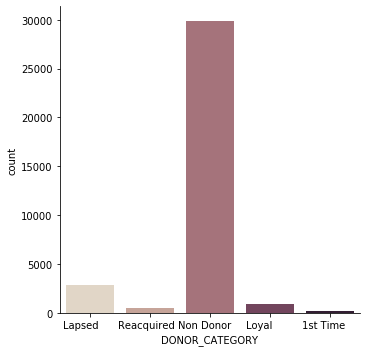

In [5]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=ub_philantropy)

### Feature Selection
Here we  need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)

In [6]:
feature_cols = ['GIFT_AMOUNT_2008_NEW', 'GIFT_AMOUNT_2009_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2011_NEW','GIFT_AMOUNT_2012_NEW','GIFT_AMOUNT_2013_NEW','GIFT_AMOUNT_2014_NEW','GIFT_AMOUNT_2015_NEW','GIFT_AMOUNT_2016_NEW','GIFT_AMOUNT_2017_NEW','GIFT_AMOUNT_2018_NEW']
X = ub_philantropy[feature_cols] # Features
y = ub_philantropy.DONOR_CATEGORY # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy<br>
Let's split the dataset by using function train_test_split().We need to pass parameters features, target, and test_set size

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn

In [8]:
clf = DecisionTreeClassifier()

In [9]:
clf = clf.fit(X_train,y_train)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
y_pred

array(['Non Donor   ', 'Non Donor   ', 'Non Donor   ', ...,
       'Reacquired  ', 'Non Donor   ', 'Non Donor   '], dtype=object)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the categories of donors<br>
Accuracy can be computed by comparing actual test set values and predicted values

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9968938070277616


Well, we got a classification rate of 99.6%, considered as good accuracy <br>

### Visualizing Decision Trees
We can use Scikit-learn's export_graphviz function to display the tree 

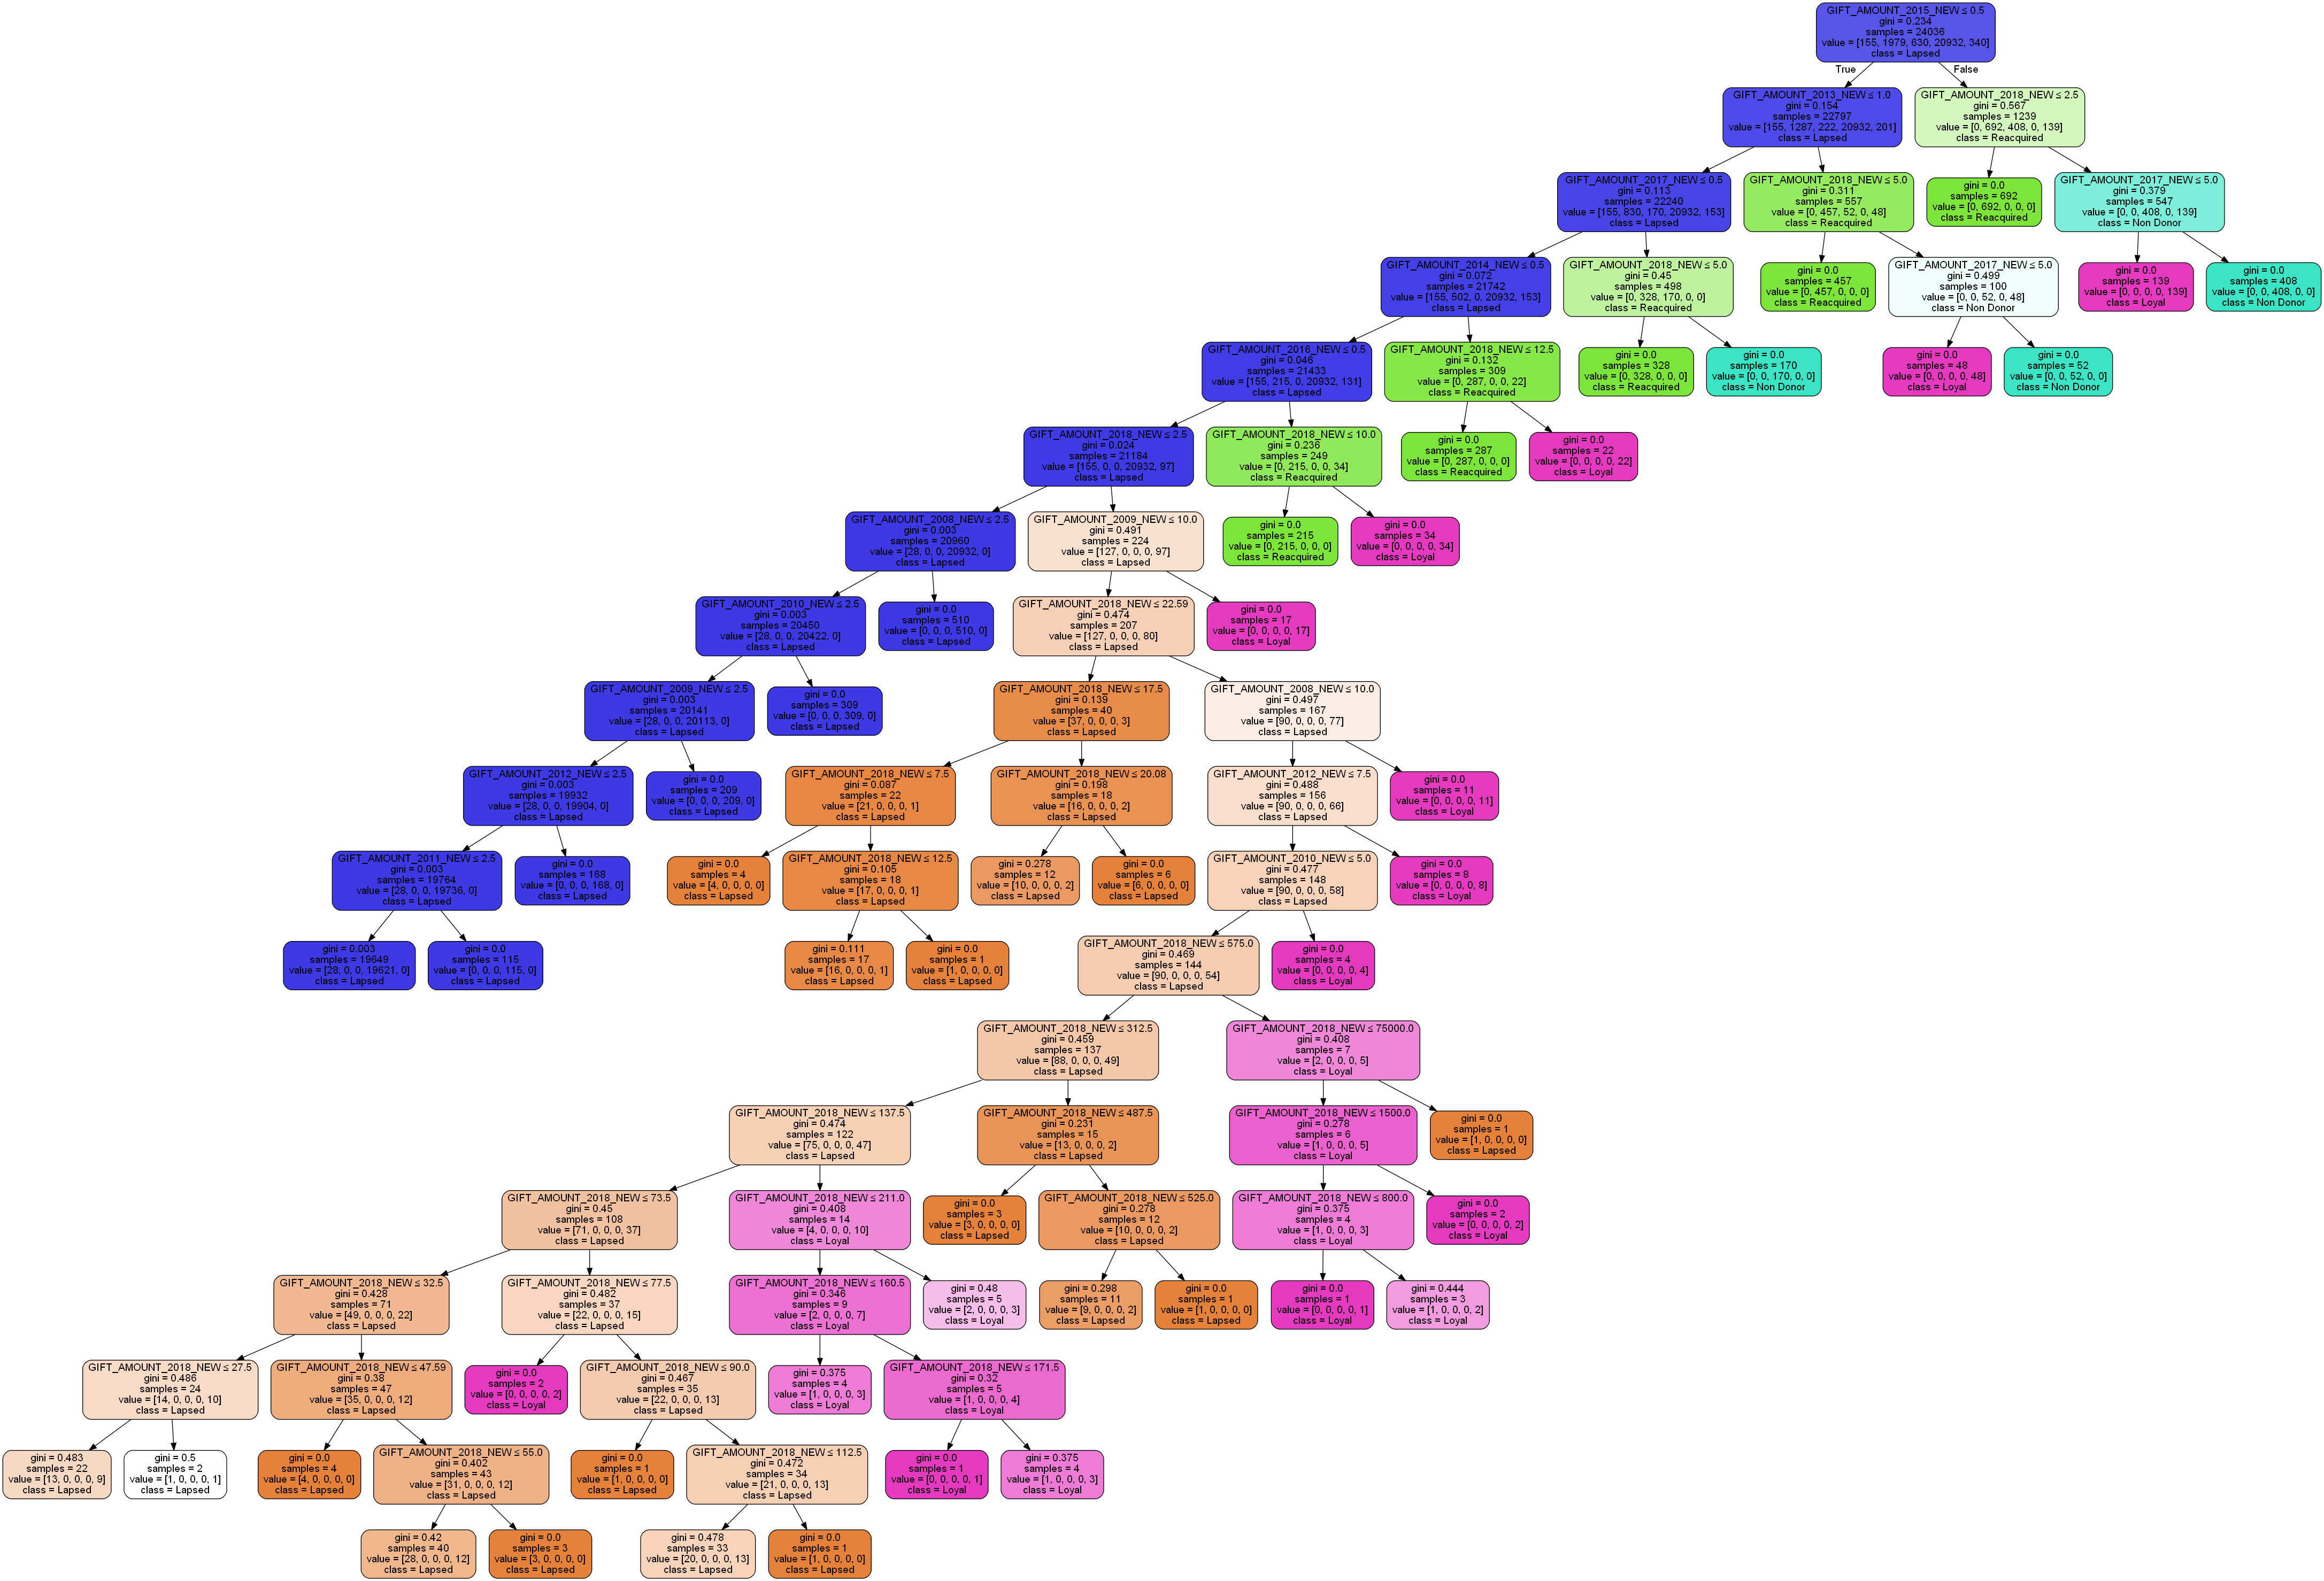

In [13]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Lapsed','Reacquired','Non Donor','Lapsed','Loyal','1st Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy.png')
Image(graph.create_png())



In the decision tree chart, each internal node has a decision rule that splits the data<br>
Gini referred as Gini ratio, which measures the impurity of the node<br>
We can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node<br>

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.971753057658707


We reduce the maximum depth which is the numberof branches a tree can handle<br>
We find that the accuracy is reduced .So we stick to a maximum depth of 6 for high accuracy

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965055329062318


### Conclusion:
    We have categorized the alumni to:
    1. Donors
    2. Non Donors
    3. Loyal Donors
    4. Acquired Donors
    5. Lapsed Donors
    
We have acheived a model accuracy of 99.6 % which is good
    
    

# Targetting the first time donors -Pre defined Classification

In [16]:
Philantrophy_data=pd.read_csv(r'F:\UB Philantrophy\Management_zipcode_1_use.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
Philantrophy_data.shape

(34338, 52)

In [18]:
Philantrophy_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x=Philantrophy_data.groupby('DONOR_CATEGORY')

In [20]:
x.size()

DONOR_CATEGORY
1st Time          223
Lapsed           2823
Loyal             920
Non Donor       29868
Reacquired        504
dtype: int64

In [21]:
First_time_donor=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]


In [22]:
First_time_donor.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
99,443721,N,U,M,25,NJ,7058,N,MS,2014,...,0,0,0,0,0,0,0,0,0,0
135,477319,N,U,M,30,NY,14217,N,BS,2018,...,0,0,0,0,0,0,0,0,0,0
150,401147,N,U,M,25,NY,10022,Y,MS,2015,...,0,1,0,3,1,0,0,0,0,0
172,466964,N,U,M,25,NY,11236,Y,MBA,2018,...,2,0,0,0,0,0,0,0,0,0
338,372594,N,S,F,30,NY,14610,Y,BS,2011,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Sampled_data=Philantrophy_data.sample(n=300, random_state=1)

In [24]:
Sampled_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
26535,412517,N,U,F,25,OH,44312,N,BS,2013,...,0,0,0,0,0,0,0,0,0,0
1960,23805,N,M,M,60,VA,20148,Y,MBA,1979,...,0,0,0,0,0,0,0,0,0,0
27638,370967,N,U,M,30,NY,11710,N,BS,2009,...,1,0,0,0,1,0,0,0,0,0
26740,295682,N,U,F,60,,31015,N,SEMBA,2003,...,0,0,0,0,0,0,0,0,0,0
34177,34021,N,U,M,50,,,N,MBA,1992,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Sampled_data['DONOR_CATEGORY'].value_counts()

Non Donor       268
Lapsed           23
Loyal             6
1st Time          2
Reacquired        1
Name: DONOR_CATEGORY, dtype: int64

In [26]:
y=Sampled_data[Sampled_data['DONOR_CATEGORY'] != '1st Time    ']

In [27]:
y.groupby('DONOR_CATEGORY').size()

DONOR_CATEGORY
Lapsed           23
Loyal             6
Non Donor       268
Reacquired        1
dtype: int64

In [28]:
First_time_with_sampled=pd.concat([First_time_donor,y])

In [29]:
First_time_with_sampled.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
99,443721,N,U,M,25,NJ,7058,N,MS,2014,...,0,0,0,0,0,0,0,0,0,0
135,477319,N,U,M,30,NY,14217,N,BS,2018,...,0,0,0,0,0,0,0,0,0,0
150,401147,N,U,M,25,NY,10022,Y,MS,2015,...,0,1,0,3,1,0,0,0,0,0
172,466964,N,U,M,25,NY,11236,Y,MBA,2018,...,2,0,0,0,0,0,0,0,0,0
338,372594,N,S,F,30,NY,14610,Y,BS,2011,...,0,0,0,0,0,0,0,0,0,0


In [30]:
First_time_with_sampled['DONOR_CATEGORY']=First_time_with_sampled['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled['MARITAL_STATUS']=First_time_with_sampled['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [31]:
First_time_with_sampled['MARITAL_STATUS']=First_time_with_sampled['MARITAL_STATUS'].apply(lambda x:x if (x == 'S'or x==  'M') else 'O')

In [32]:
First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled['AGE_BRACKET'].fillna((First_time_with_sampled['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled['ENGAGEMENT_SCORE'].mean()),inplace=True)






In [33]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

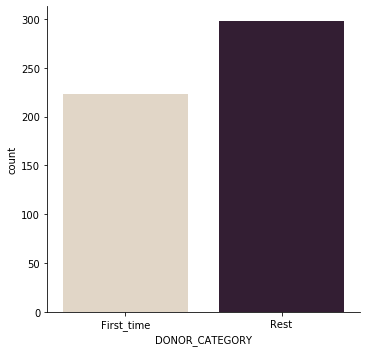

In [34]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled)

In [35]:
p=First_time_with_sampled[feature_cols]
q=First_time_with_sampled['DONOR_CATEGORY']

In [36]:
p_train,p_test,q_train,q_test = train_test_split(p, q, test_size=0.3, random_state=1)

In [37]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf = clf.fit(p_train,q_train)
q_pred = clf.predict(p_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(q_test, q_pred))

Accuracy: 0.9044585987261147


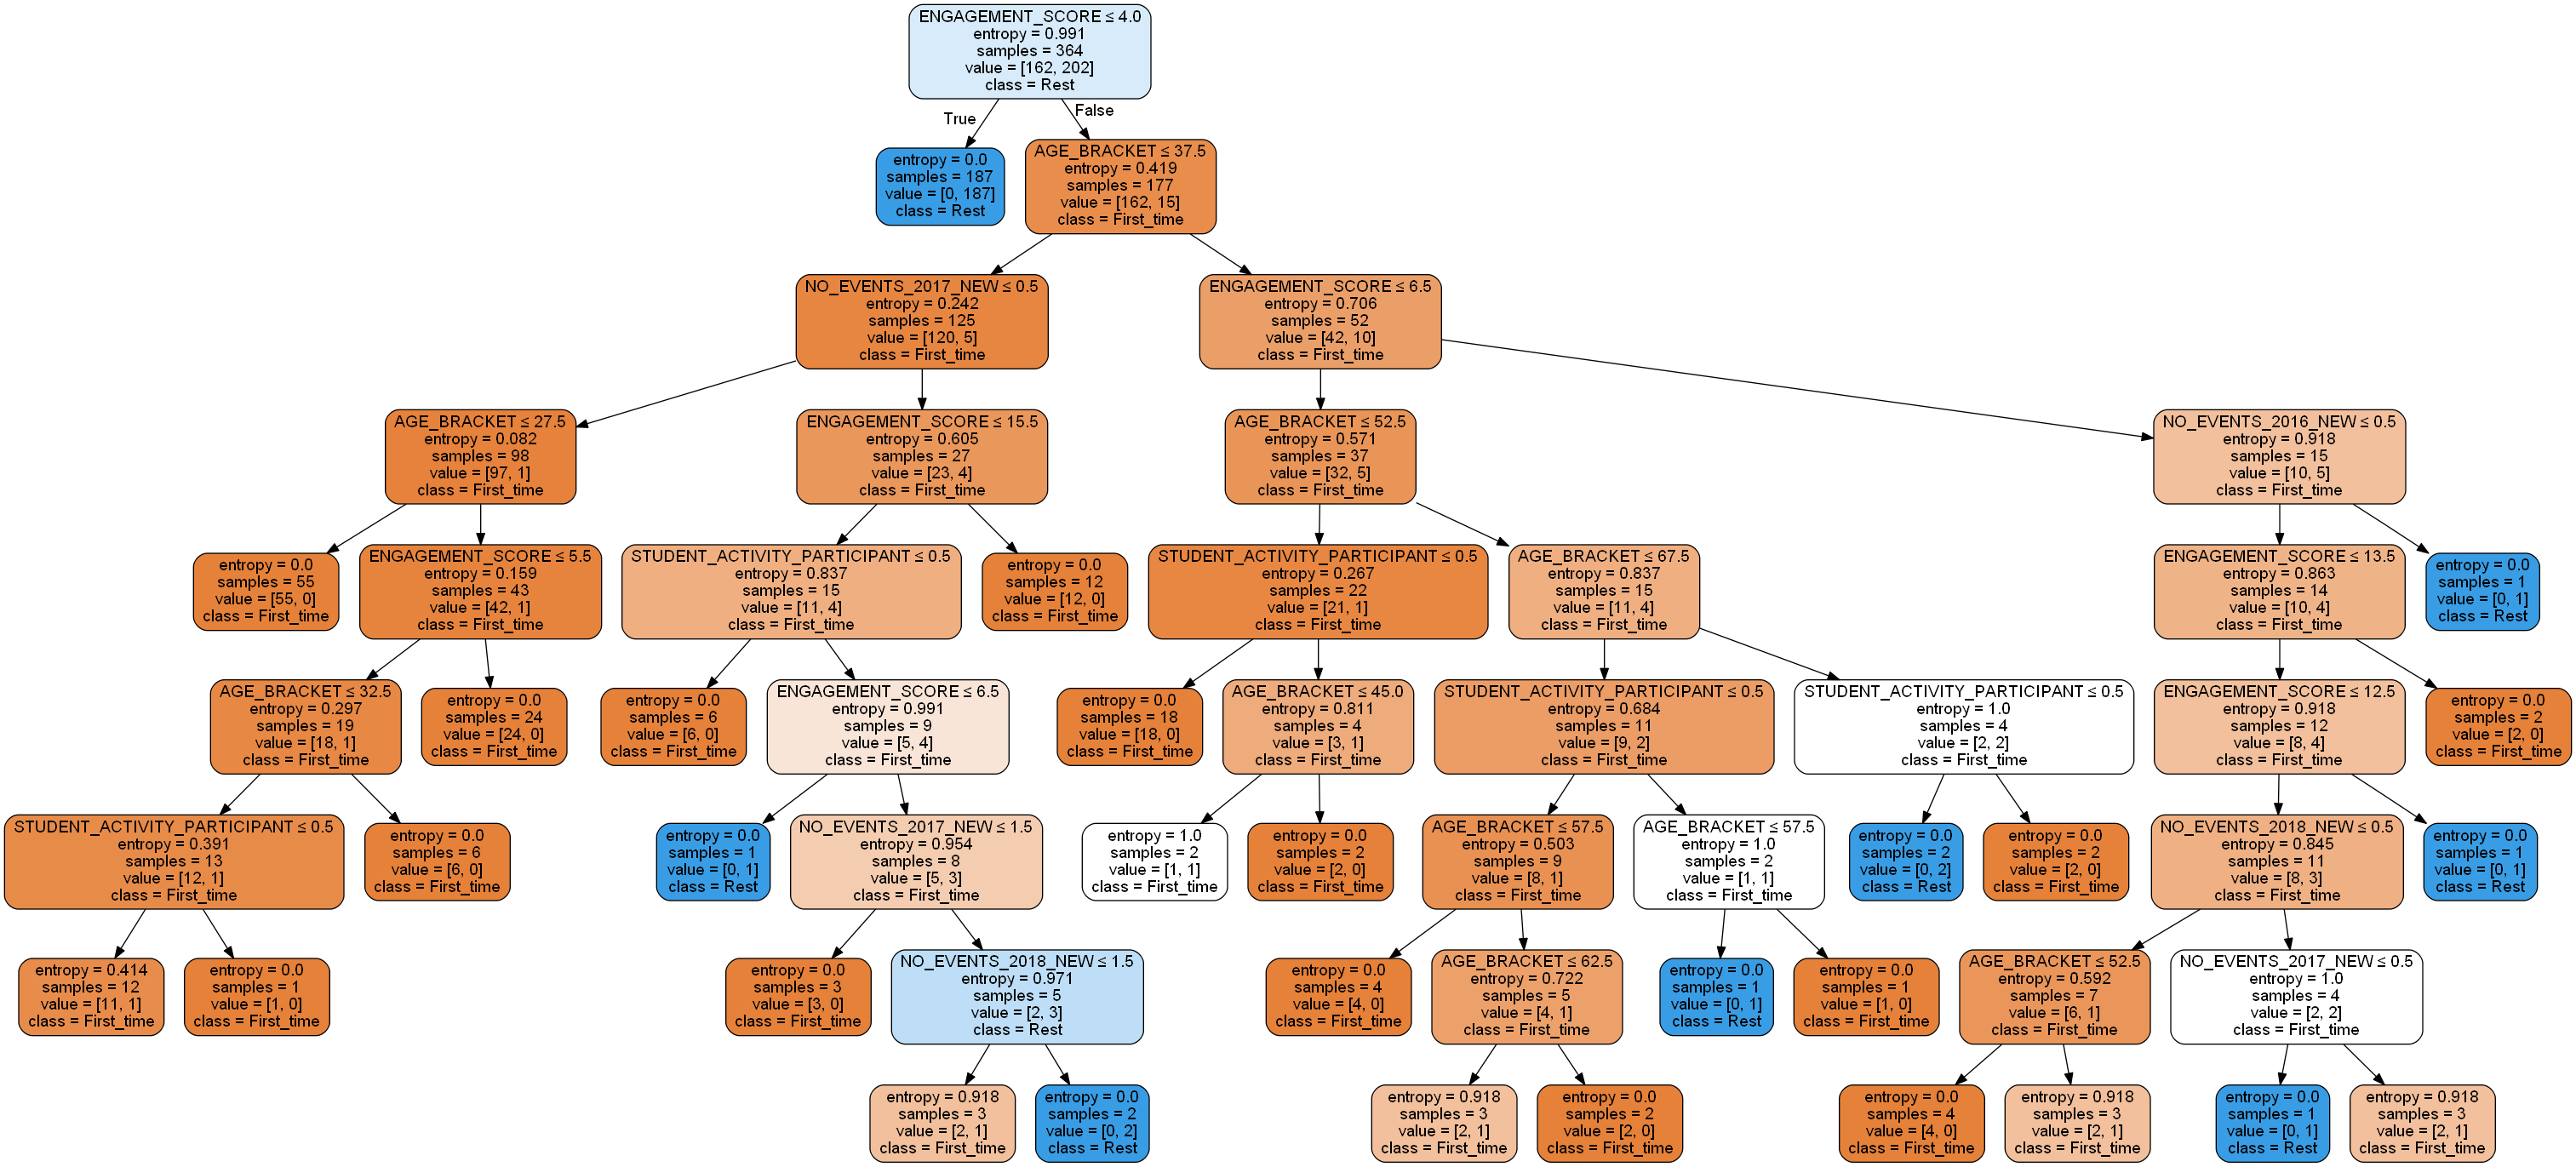

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy.png')
Image(graph.create_png())

### Reclassification - Based on Last given Amount

In [40]:
Philantrophy_data['LAST_GIFT_DATE']=Philantrophy_data['LAST_GIFT_DATE'].apply(lambda x:str(x))

In [41]:
Philantrophy_data['LAST_GIFT_DATE'].dropna()

0        23-08-2018
1        10-10-2017
2        15-01-1992
3        28-01-1987
4        30-12-1994
            ...    
34333           nan
34334           nan
34335           nan
34336           nan
34337           nan
Name: LAST_GIFT_DATE, Length: 34338, dtype: object

In [42]:
Philantrophy_data['LAST_GIFT_DATE'].dropna().isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
34333    False
34334    False
34335    False
34336    False
34337    False
Name: LAST_GIFT_DATE, Length: 34338, dtype: bool

In [43]:
for i in range(len(Philantrophy_data['LAST_GIFT_DATE'])):    
    try:
        string=Philantrophy_data.loc[i,'LAST_GIFT_DATE']    
        string=(string[6]+string[7]+string[8]+string[9])
        Philantrophy_data.loc[i,'LAST_GIFT_DATE']=string
    except:
        continue
    

In [44]:
Philantrophy_data.iloc[1,20]

'Reacquired  '

In [45]:
Philantrophy_data.iloc[1,34]

'2017'

In [46]:
for i in range(34338):
    if Philantrophy_data.iloc[i,34] == '2018':
        Philantrophy_data.iloc[i,20] = '1st Time    '
        
     
        

In [47]:
Philantrophy_data['DONOR_CATEGORY'].value_counts()

Non Donor       29848
Lapsed           2699
1st Time         1282
Loyal             293
Reacquired        216
Name: DONOR_CATEGORY, dtype: int64

In [48]:
First_time_donor_new=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]

In [49]:
Sampled_data_new=Philantrophy_data.sample(n=1200, random_state=1)

In [50]:
y_new=Sampled_data_new[Sampled_data_new['DONOR_CATEGORY'] != '1st Time    ']

In [51]:
First_time_with_sampled_new=pd.concat([First_time_donor_new,y_new])

In [52]:
First_time_with_sampled_new['DONOR_CATEGORY']=First_time_with_sampled_new['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled_new['MARITAL_STATUS']=First_time_with_sampled_new['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [53]:
First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled_new['AGE_BRACKET'].fillna((First_time_with_sampled_new['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled_new['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled_new['ENGAGEMENT_SCORE'].mean()),inplace=True)




In [54]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

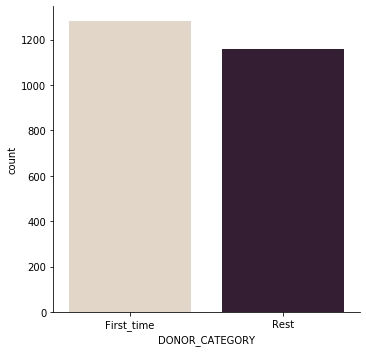

In [55]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled_new)

In [56]:
p1=First_time_with_sampled_new[feature_cols]
q1=First_time_with_sampled_new['DONOR_CATEGORY']

In [57]:
p1_train,p1_test,q1_train,q1_test = train_test_split(p1, q1, test_size=0.3, random_state=1)

In [58]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf1 = clf.fit(p1_train,q1_train)
q1_pred = clf1.predict(p1_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(q1_test, q1_pred))

Accuracy: 0.9631147540983607


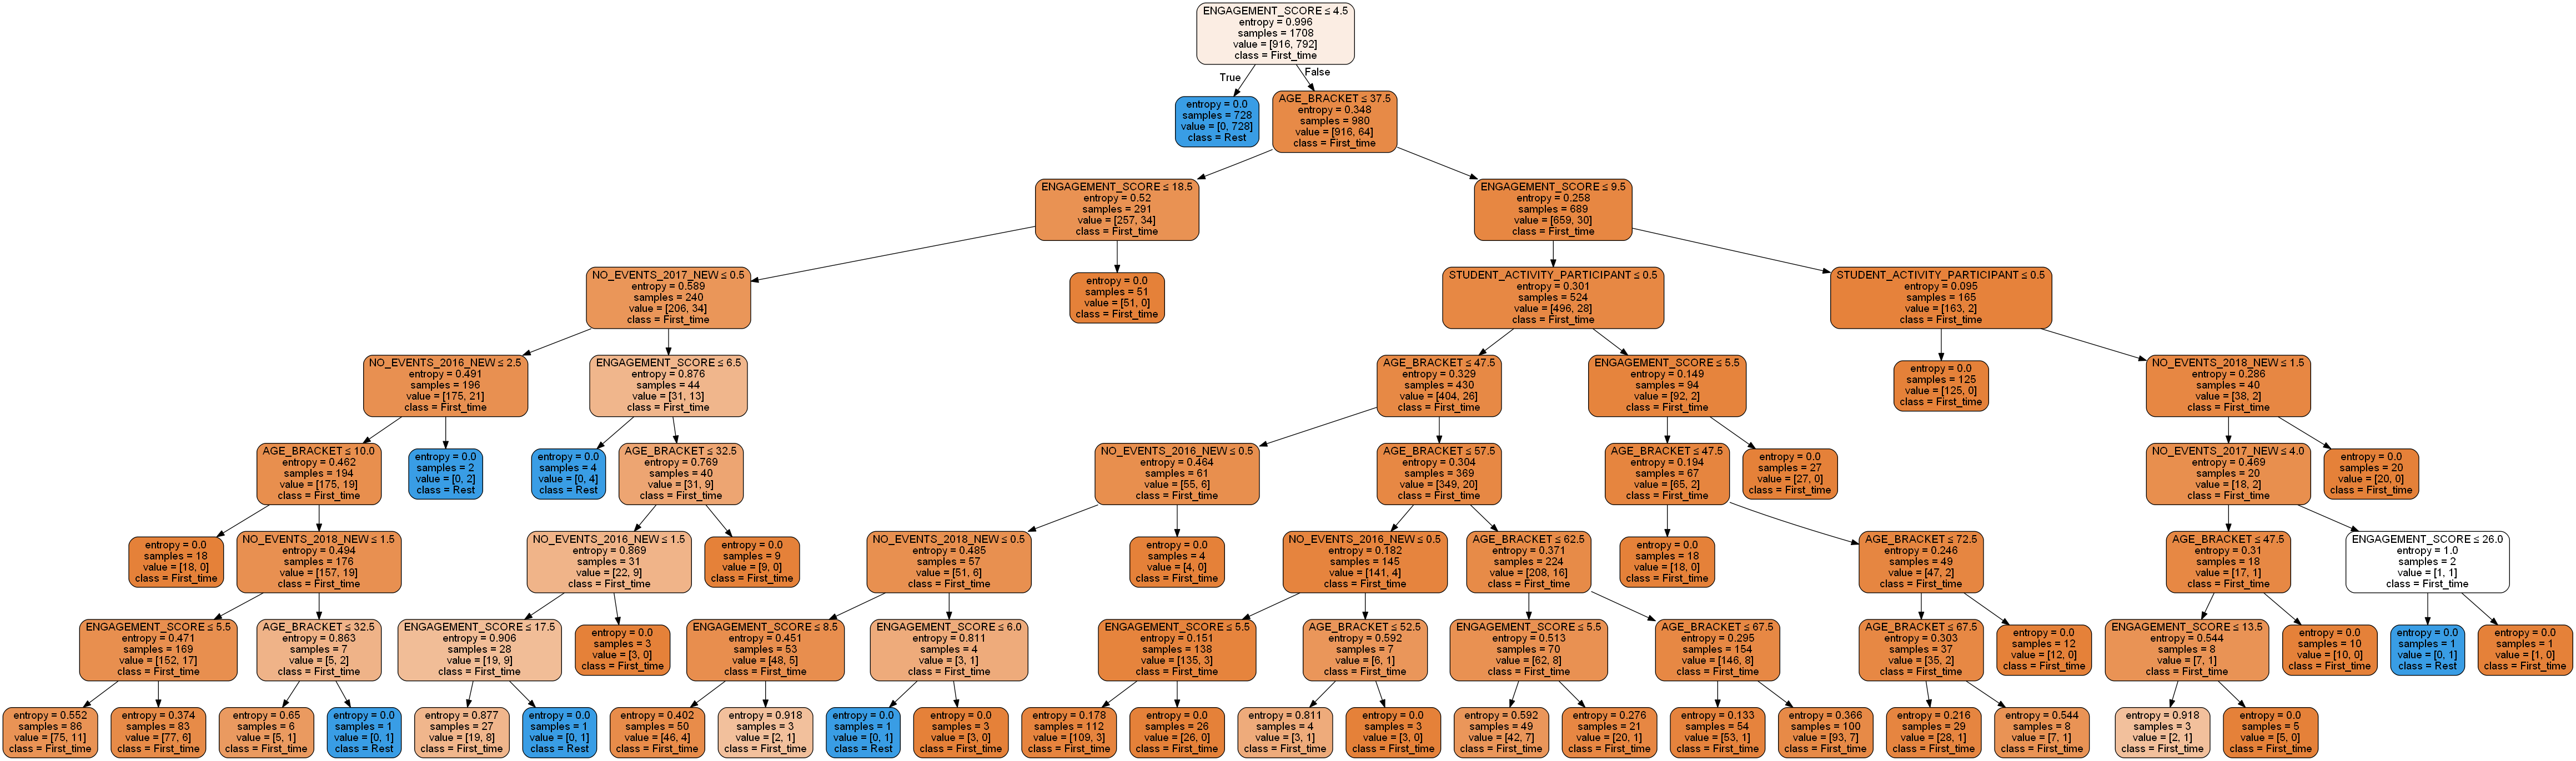

In [60]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_new.png')
Image(graph.create_png())